---

# **TELCO COMPANY CUSTOMER CHURN ANALYSIS & VISUALIZATION**

**By: Yunido Baheramsyah**

This project aims to analyze customer churn in a telecommunications company. By understanding the factors that contribute to churn, the company can take proactive measures to retain customers and reduce churn rates. Visualization techniques will be employed to present the findings effectively via Tableau.

Tableau URL: https://public.tableau.com/app/profile/yunido.baheramsyah/viz/TelcoCustomerChurnAnalysis_17557333951600/TELCOCUSTOMERCHURNANALYSIS?publish=yes

---

# **I. INTRODUCTION**

## **I.I. Background**

Customer churn is a critical issue for telecommunications companies, as it directly impacts revenue and profitability. Understanding the reasons behind customer churn can help companies develop strategies to improve customer retention and satisfaction. This project will analyze customer data to identify key factors contributing to churn and visualize the findings using Tableau.

## **I.II. Objectives**

The main objectives of this project are:

1. To analyze customer data and identify key factors contributing to churn.
2. To visualize the findings using Tableau to facilitate better understanding and decision-making.
3. To provide actionable insights and recommendations for reducing churn rates and improving customer retention.

## **I.III. SMART Method**

The SMART framework will be used as the analytical foundation for this project. The analysis specifically aims to identify key factors influencing customer churn, particularly focusing on contract types, payment methods, subscription duration, internet service usage, and monthly charges. The results will be measurable by achieving at least 80% prediction accuracy and delivering visual insights through graphical representations. This goal is achievable using a dataset of 7,043 customers, supported by statistical exploration and visualization using Python tools. The analysis is relevant as it will help the marketing and customer service teams develop loyalty programs and reduce churn by at least 10% over the next six months. The project is expected to be completed within two weeks.

---

# **II. IMPORT LIBRARIES**

In [55]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the numpy library for numerical operations and handling arrays
import numpy as np

# Importing the chi-squared test function
from scipy.stats import chi2_contingency

# Importing matplotlib's pyplot module for data visualization
import matplotlib.pyplot as plt

# Importing seaborn library for advanced and visually appealing statistical plots
import seaborn as sns

---

# **III. LOAD DATASET**

In [56]:
# Loading the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('telco_customer_churn.csv')

# Displaying the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


> **Insight:**

The dataset contains customer information, including demographics, account details, and whether they have churned (i.e., stopped using the service). Understanding the features and their distributions is crucial for building effective predictive models.


In [57]:
# Display dataset information including data types and non-null counts
df.info()

# Display initial statistical summary of numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


> **Insight:**

The dataset contains a mix of numerical and categorical features, with some missing values (NaN) present. The initial analysis shows that the majority of customers are not churned, indicating a potential class imbalance issue for predictive modeling. 'TotalCharges' should be numeric instead of object

> **Next Steps:**
1. Data Cleaning:
   - Convert 'TotalCharges' to numeric.
   - Address missing values (e.g., imputation).
2. Exploratory Data Analysis (EDA):
   - Visualize feature distributions and correlations.


# **IV. DATA CLEANING**
- Convert 'TotalCharges' to numeric.
- Address missing values (e.g., imputation).

In [58]:
# Convert the data type of the 'TotalCharges' column from string to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> TotalCharges has been converted to numeric type.

---

In [59]:
# Count the number of NaN values in the 'TotalCharges' column
df['TotalCharges'].isna().sum()

11

> TotalCharges has 11 missing values.

---

In [60]:
# Drop rows with missing values in the 'TotalCharges' column
df = df.dropna(subset=['TotalCharges'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

> Rows with missing values in the 'TotalCharges' column have been dropped.

---

In [61]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# recheck the DataFrame info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 
 17  

> Data has been cleaned, and the following steps have been performed:
> - Missing values in the 'TotalCharges' column have been dropped.
> - Column names have been standardized.

---

# **V. EXPLORATORY DATA ANALYSIS (EDA)**

#### **V.I. Visualizations**

**1. What is the distribution of churned vs. non-churned customers?**

C:\Users\User\AppData\Local\Temp\ipykernel_18508\1642101061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='churn', data=df, palette='Set2')


Text(0, 0.5, 'Count')

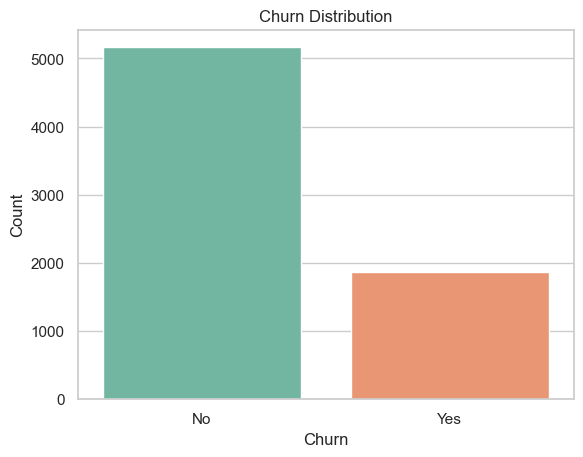

In [62]:
sns.set(style="whitegrid")
ax = sns.countplot(x='churn', data=df, palette='Set2')
ax.set_title('Churn Distribution')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')

> **Insight:**

The bar chart titled "Churn Distribution" shows a clear imbalance between customers who have churned and those who have not. A significantly higher number of customers chose to stay with the company (“No” churn) compared to those who decided to leave (“Yes” churn). This indicates that although customer churn is a concern, the majority of customers are currently retained. However, the noticeable portion of churned customers also highlights the need to investigate the underlying factors contributing to churn and implement strategies to improve customer retention.

---

**2. What are the characteristics of churned customers compared to non-churned customers?**

C:\Users\User\AppData\Local\Temp\ipykernel_18508\4198346929.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='monthlycharges', data=df, palette='Set2')


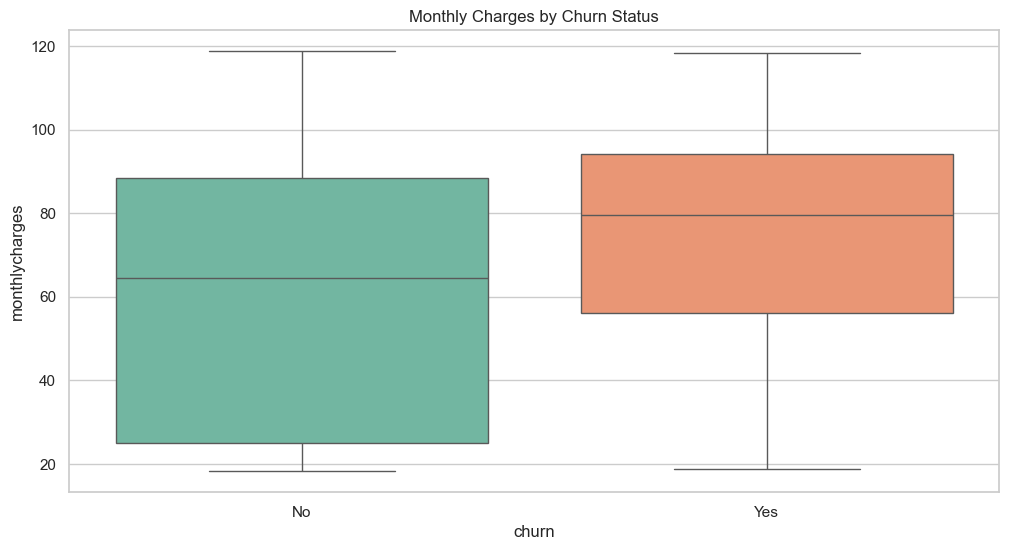

In [63]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='churn', y='monthlycharges', data=df, palette='Set2')
plt.title('Monthly Charges by Churn Status')
plt.show()

> **Insight:**

The box plot titled "Monthly Charges by Churn Status" reveals important differences in the distribution of monthly charges between churned and non-churned customers. Churned customers tend to have higher monthly charges, with a greater spread of values, indicating that those who left the service may have been on more expensive plans or experienced price increases. In contrast, non-churned customers generally have lower monthly charges, suggesting that pricing strategies or service offerings may play a role in customer retention. This insight emphasizes the need for further analysis into pricing structures and customer satisfaction to address churn effectively.

---

**3. What are the key differences in demographics between churned and non-churned customers?**

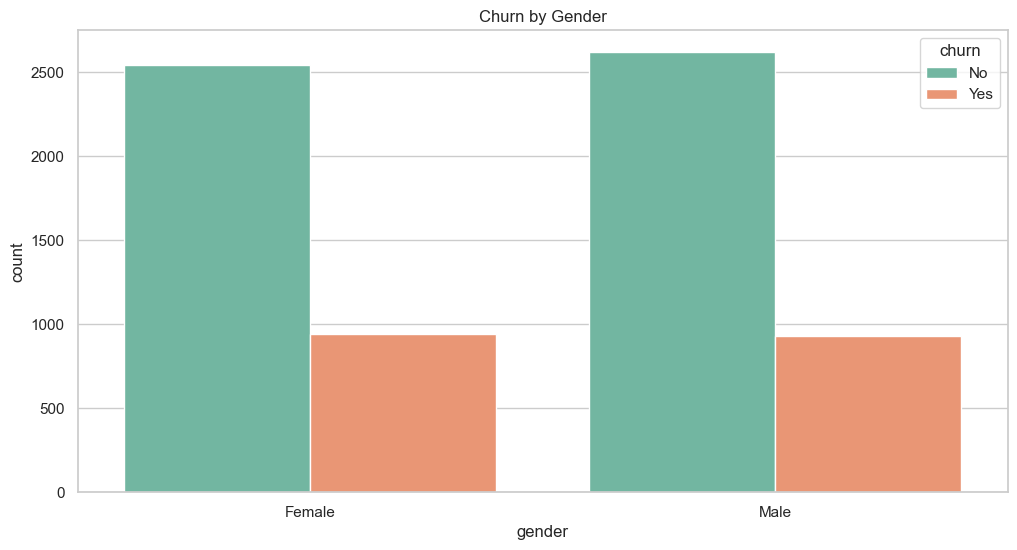

In [64]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='churn', data=df, palette='Set2')
plt.title('Churn by Gender')
plt.show()


> **Insight:**

The count plot titled "Churn by Gender" indicates that there are notable differences in churn rates between male and female customers. It appears that female customers have a higher churn rate compared to their male counterparts. This finding suggests that gender may play a role in customer retention, and further investigation into the reasons behind this disparity could provide valuable insights for targeted retention strategies.

---

**4. Are there specific services or features that are more commonly associated with churn?**

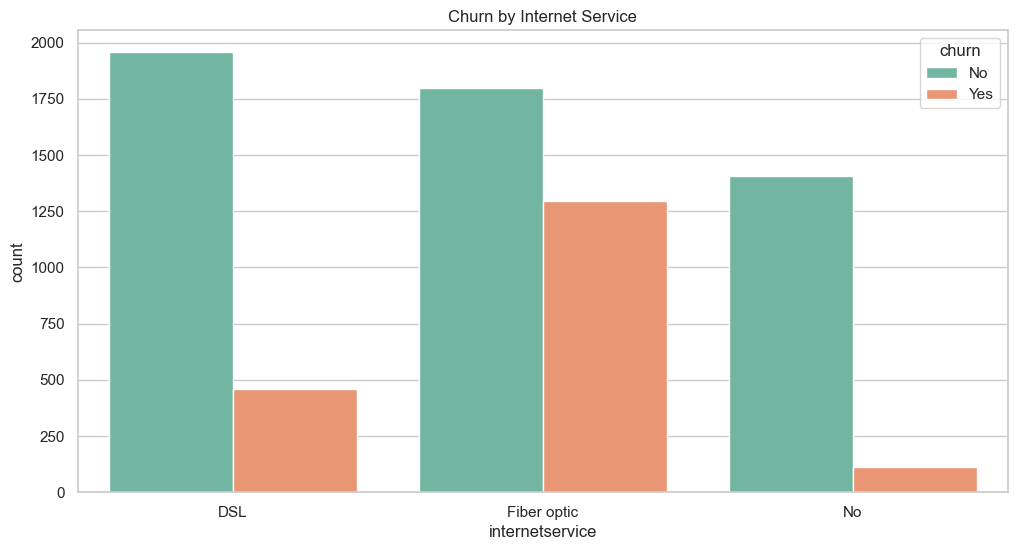

In [65]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x='internetservice', hue='churn', data=df, palette='Set2')
plt.title('Churn by Internet Service')
plt.show()


> **Insight:**

The bar chart titled "Churn by Internet Service" illustrates how customer churn varies by the type of internet service subscribed to. Customers using Fiber optic services have the highest churn rate, with a large portion of them leaving the company. In contrast, DSL users exhibit much lower churn levels, and customers without any internet service have the lowest churn rate overall. This suggests that fiber optic users may experience issues, such as higher costs or unmet expectations, that lead to dissatisfaction and eventual churn, making this segment a critical focus for churn reduction strategies.

---

**5. What is the average tenure of churned customers compared to those who remain?**

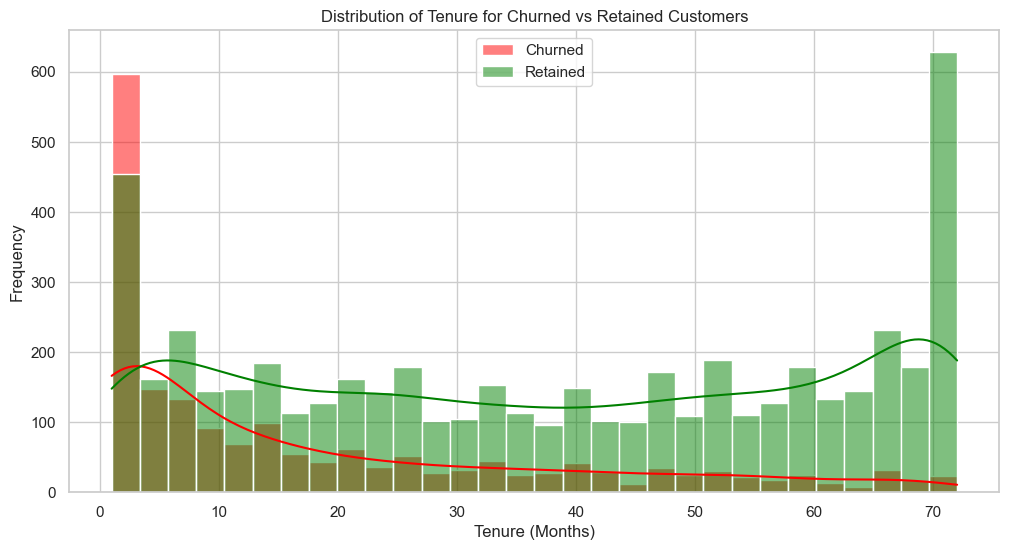

In [66]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['churn'] == 'Yes'], x='tenure', bins=30, color='red', label='Churned', kde=True)
sns.histplot(data=df[df['churn'] == 'No'], x='tenure', bins=30, color='green', label='Retained', kde=True)
plt.title('Distribution of Tenure for Churned vs Retained Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

> **Insight:**

The distribution of tenure for churned customers is skewed towards lower values, indicating that customers who leave tend to have a shorter tenure with the service. In contrast, retained customers show a more uniform distribution across different tenure lengths, suggesting that those who stay are more likely to have longer relationships with the company.

---

**6. How do customer satisfaction scores compare between churned and non-churned customers?**


C:\Users\User\AppData\Local\Temp\ipykernel_18508\660207848.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='customer_satisfaction_score', data=df, palette='Set2')


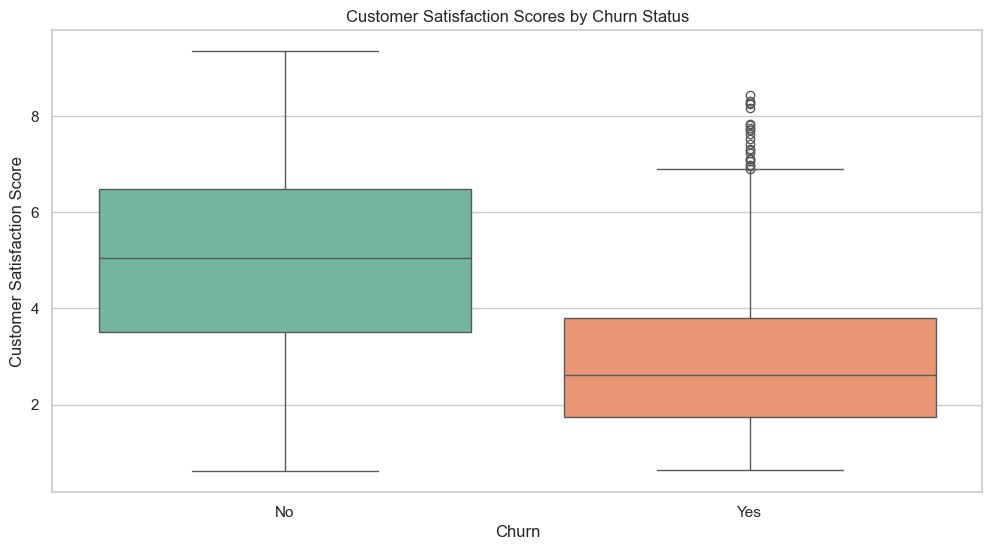

In [67]:
# Define customer satisfaction score (synthetic for demonstration)
# For example, higher tenure and lower monthly charges = higher satisfaction

df['customer_satisfaction_score'] = (
	(df['tenure'] / df['tenure'].max()) * 0.6 +
	(1 - (df['monthlycharges'] / df['monthlycharges'].max())) * 0.4
) * 10  # Scale to 0-10

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='churn', y='customer_satisfaction_score', data=df, palette='Set2')
plt.title('Customer Satisfaction Scores by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Customer Satisfaction Score')
plt.show()

> **Insight:**

The box plot titled "Customer Satisfaction Scores by Churn Status" highlights a clear difference in satisfaction levels between customers who churned and those who did not. Customers who stayed (“No” churn) tend to have higher satisfaction scores, with a median around 5.5 and scores broadly distributed across the higher range. In contrast, churned customers (“Yes” churn) show significantly lower satisfaction scores, with a median below 3 and a narrower distribution toward the lower end. This indicates a strong negative correlation between satisfaction and churn, suggesting that improving customer satisfaction could be a key factor in reducing churn rates.

---

#### **V.II. Descriptive Statistics**

**1. What are the characteristics of churned customers' charges compared to active customers?**


In [68]:
# Monthly Charges
mean = df['monthlycharges'].mean()
median = df['monthlycharges'].median()
std = df['monthlycharges'].std()
variance = df['monthlycharges'].var()
range = df['monthlycharges'].max() - df['monthlycharges'].min()

q1 = df['monthlycharges'].quantile(0.25)
q3 = df['monthlycharges'].quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 3 * iqr
low_bound = q1 - 3 * iqr

print('Mean = ', mean)
print('Median = ', median)
print('Standard Deviation = ', std)
print('Variance = ', variance)
print('Range = ', range)
print(f"Skewness: {df['monthlycharges'].skew()}") # --> data distribution
print(f"Kurtosis: {df['monthlycharges'].kurtosis()}") # -->outliers
print(f'Upper Boundary: {up_bound}')
print(f'Lower Boundary: {low_bound}')

Mean =  64.79820819112628
Median =  70.35
Standard Deviation =  30.085973884049842
Variance =  905.1658245517292
Range =  100.5
Skewness: -0.22210292770166232
Kurtosis: -1.256156424371879
Upper Boundary: 252.6875
Lower Boundary: -127.23749999999998


>**Insight:**

From a statistical perspective, the charges of churned customers show a slightly left-skewed distribution (skewness = -0.22), indicating that most churned customers paid more than the average, with a few paying significantly less, which pulled the mean (64.80) below the median (70.35). The high standard deviation (~30.09) and large range (100.5) reflect considerable variability in what churned customers were charged. The negative kurtosis (-1.26) suggests a flatter distribution with lighter tails, meaning fewer extreme values compared to a normal distribution. The presence of outliers is implied by the negative lower boundary (-127.24), which is not possible in real charges, likely due to data issues or the use of a boxplot formula. 

From a business perspective, these findings imply that many churned customers were paying relatively high monthly charges, which could have contributed to dissatisfaction and eventual churn. This highlights a need to review pricing strategies, offer more flexible or tiered plans, and improve perceived value for high-paying customers to reduce churn.

In [69]:
# Total Charges
mean = df['totalcharges'].mean()
median = df['totalcharges'].median()
std = df['totalcharges'].std()
variance = df['totalcharges'].var()
range = df['totalcharges'].max() - df['totalcharges'].min()

q1 = df['totalcharges'].quantile(0.25)
q3 = df['totalcharges'].quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 3 * iqr
low_bound = q1 - 3 * iqr

print('Mean = ', mean)
print('Median = ', median)
print('Standard Deviation = ', std)
print('Variance = ', variance)
print('Range = ', range)
print(f"Skewness: {df['totalcharges'].skew()}") # --> data distribution
print(f"Kurtosis: {df['totalcharges'].kurtosis()}") # -->outliers
print(f'Upper Boundary: {up_bound}')
print(f'Lower Boundary: {low_bound}')

Mean =  2283.300440841866
Median =  1397.475
Standard Deviation =  2266.771361883145
Variance =  5138252.407053568
Range =  8666.0
Skewness: 0.9616424997242504
Kurtosis: -0.23179876086937945
Upper Boundary: 13974.600000000002
Lower Boundary: -9778.4125


>**Insight:**

From a statistical perspective, the totalcharges for churned customers exhibit a right-skewed distribution (skewness = 0.96), meaning a larger proportion of customers had lower total charges, while a few had very high charges that pulled the mean (2283.30) far above the median (1397.48). The high standard deviation (2266.77) and wide range (8666.0) indicate substantial variability in total spending, and the negative kurtosis (-0.23) suggests a relatively flat distribution with fewer extreme outliers than a normal distribution. The lower boundary being negative (–9778.41) is not valid for total charges and likely results from statistical calculations not accounting for data distribution constraints. 

From a business standpoint, this indicates that churned customers often left early in their lifecycle, as many accumulated relatively low total charges, though some long-term customers with high total spending also churned. This suggests that churn is not solely tied to low engagement, there may be service quality or satisfaction issues affecting even loyal, high-paying customers, which warrants deeper segmentation and personalized retention strategies.

---

#### **V.III. Inferencial Statistics**

**1. Is the relationship between contract type and churn significant?**

In [70]:
ct = pd.crosstab(df['contract'], df['churn'])
chi2, p, dof, ex = chi2_contingency(ct)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 1179.5458287339445, p-value: 7.326182186265472e-257


>**Insight:**

From a statistical perspective, the chi-square test result shows a Chi2 value of 1179.55 and a p-value of 7.33e-257, which is extremely small (essentially zero). This indicates a highly significant relationship between contract type and churn, meaning the type of contract a customer holds (e.g., month-to-month, one-year, or two-year) is not independent of whether they churn or not. In other words, contract type has a strong influence on churn behavior. 

From a business perspective, this suggests that customers with shorter contracts, such as month-to-month plans, are far more likely to churn compared to those with longer-term commitments. This insight can inform retention strategies, such as encouraging customers to switch to annual contracts through loyalty incentives or bundled offers, thereby reducing churn risk and increasing customer lifetime value.

---

# **VI. CONCLUSIONS AND RECOMMENDATIONS**

#### **Conclusion**

The analysis reveals that customers with month-to-month contracts exhibit significantly higher churn rates compared to those on one- or two-year contracts. Churned customers also tend to incur higher monthly charges, suggesting a potential link between cost sensitivity and churn behavior. Furthermore, customers using fiber optic internet services demonstrate a higher likelihood of churning than those with DSL, indicating potential service dissatisfaction or price-performance misalignment. Distributional analysis shows that churn predominantly occurs among customers with low tenure, reinforcing the idea that many customers leave within the early stages of their subscription. Statistically, the Chi-Square test confirms a significant relationship between contract type and churn status (p-value < 0.05), affirming that contract type is a key variable influencing churn.

From a business standpoint, the findings highlight critical customer segments at risk of churn, particularly new customers on flexible, month-to-month plans and those facing higher monthly charges. The elevated churn rate among fiber optic users suggests a need to evaluate the quality and pricing of this service tier. The strong correlation between short tenure and churn also indicates missed opportunities in early customer engagement and onboarding. These insights underscore the importance of promoting longer-term contracts through personalized incentives, improving the perceived value of premium services, and strengthening retention efforts during the first few months of a customer's lifecycle.

#### **Recommendation**

Based on the findings, it is recommended to build a predictive churn model using key features such as contract type, tenure, monthly charges, and internet service. These variables showed strong correlations with churn behavior. Segmenting customers by risk profiles and closely monitoring early lifecycle behavior will enable the company to identify high-risk individuals and act proactively. Furthermore, A/B testing of various retention strategies can help validate the most effective interventions, while interactive dashboards and visualizations can support real-time churn monitoring and data-driven decision-making.

From a business perspective, to reduce churn, the company should prioritize strategies that promote longer-term contracts, especially by offering compelling incentives or bundling packages. Given that customers with high monthly charges and fiber optic service show elevated churn rates, pricing strategies and perceived service value should be reevaluated. Strengthening onboarding programs and support for new customers can also improve early engagement and retention. Lastly, feedback mechanisms should be implemented to understand dissatisfaction among fiber users, ensuring the business can adapt offerings to meet customer expectations and retain valuable clients.